In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
pima = pd.read_csv("./cl2.csv")
print(pima.head())

   Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0         192            7      159             66              0        0   
1         193           11      135              0              0        0   
2         194            8       85             55             20        0   
3         195            5      158             84             41      210   
4         196            1      105             58              0        0   

    BMI  DiabetesPedigreeFunction  Age  Outcome  
0  30.4                     0.383   36        1  
1  52.3                     0.578   40        1  
2  24.4                     0.136   42        0  
3  39.4                     0.395   29        1  
4  24.3                     0.187   21        0  


In [2]:
# Split the data into features (X) and target variable (y)
X = pima.drop(columns='Outcome')
y = pima['Outcome']

In [3]:
# Number of negative and positive cases in the data
num_obs = len(pima)
negative = len(pima.loc[pima['Outcome'] == 0])
positive = len(pima.loc[pima['Outcome'] == 1])
print("Number of negative cases:  {0} ({1:2.2f}%)".format(negative, ((1.00 * negative)/(1.0 * num_obs)) * 100))
print("Number of positve cases:  {0} ({1:2.2f}%)".format(positive, ((1.00 * positive)/(1.0 * num_obs)) * 100))

Number of negative cases:  377 (65.45%)
Number of positve cases:  199 (34.55%)


In [4]:
# Split xscale
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0) 

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

  #L500
  #----------------------------------------------
LR = LogisticRegression()
LR.fit(X_train, y_train)
yhatLR = LR.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, yhatLR))
print(classification_report(y_test, yhatLR))


Confusion Matrix: 
 [[73 11]
 [15 17]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        84
           1       0.61      0.53      0.57        32

    accuracy                           0.78       116
   macro avg       0.72      0.70      0.71       116
weighted avg       0.77      0.78      0.77       116



c:\Users\fafaf\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Number of each case in the data training and testing
print("Original negative : {0} ({1:0.2f}%)".format(len(pima.loc[pima['Outcome'] == 0]), (len(pima.loc[pima['Outcome'] == 0])/len(pima.index)) * 100.0))
print("Original positive : {0} ({1:0.2f}%)".format(len(pima.loc[pima['Outcome'] == 1]), (len(pima.loc[pima['Outcome'] == 1])/len(pima.index)) * 100.0))
print("")
print("Training negative : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("Training positive : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("")
print("Test negative     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))
print("Test positive     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))

Original negative : 377 (65.45%)
Original positive : 199 (34.55%)

Training negative : 293 (63.70%)
Training positive : 167 (36.30%)

Test negative     : 84 (72.41%)
Test positive     : 32 (27.59%)


In [6]:
from sklearn.metrics import confusion_matrix
import math
def evaluate(Y_true, Y_predict):
    tn, fp, fn, tp = confusion_matrix(Y_true,Y_predict).ravel()
    acc = (tp +tn)/ (tp + tn + fn + fp)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = (2*tp)/(2*tp + fp + fn)
    specificity = tn / (fp + tn) 
    MCC = ((tp*tn) - (fp*fn)) / math.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
    return acc, precision, recall, f1_score, specificity, MCC

In [7]:
from sklearn.linear_model import LogisticRegression

def Diabetes(output = ['Outcome']):

  #LR
  #----------------------------------------------
  LR = LogisticRegression()
  LR.fit(X_train, y_train)
  yhatLR = LR.predict(X_test)

  acc, precision, recall, f1_score, specificity, MCC = evaluate(y_test, yhatLR)
  print(output, ' LR      acc:  {:.04f}    precision:   {:.04f}    recall :   {:.04f}   f1_score:   {:.04f}  specificity:   {:.04f}  MCC:   {:.04f}'.format(acc, precision, recall, f1_score, specificity, MCC))

  return LR, yhatLR


In [8]:
Diabetes(output = ['Outcome'])
print('------------')

['Outcome']  LR      acc:  0.7759    precision:   0.6071    recall :   0.5312   f1_score:   0.5667  specificity:   0.8690  MCC:   0.4181
------------


c:\Users\fafaf\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['Outcome']  LR      acc:  0.7759    precision:   0.6071    recall :   0.5312   f1_score:   0.5667  specificity:   0.8690  MCC:   0.4181


c:\Users\fafaf\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


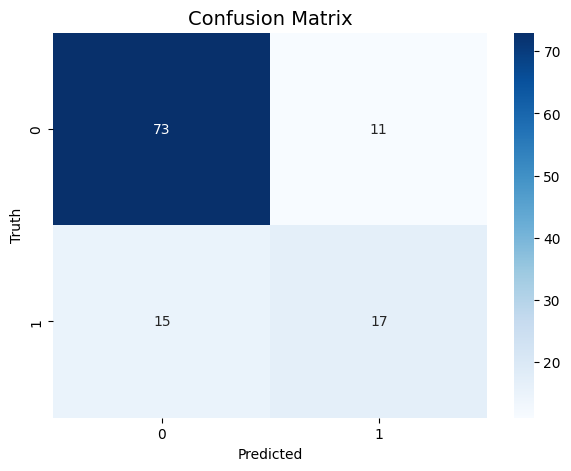

In [9]:
# Call the function
LR, yhatLR = Diabetes()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhatLR)

# Plot confusion matrix using seaborn
plt.figure(figsize=(7,5))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)

# Set labels
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [10]:
# training acc
from sklearn.metrics import confusion_matrix, classification_report
predictions1 = LR.predict(X_train)
print("Confusion Matrix: \n", confusion_matrix(y_train, predictions1))
print(classification_report(y_train, predictions1))

Confusion Matrix: 
 [[252  41]
 [ 91  76]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       293
           1       0.65      0.46      0.54       167

    accuracy                           0.71       460
   macro avg       0.69      0.66      0.66       460
weighted avg       0.70      0.71      0.70       460



In [11]:
model = LogisticRegression(warm_start=True)

In [12]:
import utils
utils.set_initial_params(model, n_features=X_train.shape[1], n_classes=2)

In [18]:
import flwr as fl
import warnings
from sklearn.metrics import log_loss

class IrisClient(fl.client.NumPyClient):
        def get_parameters(self, config):  # type: ignore
            return utils.get_model_parameters(model)

        def fit(self, parameters, config):  # type: ignore
            utils.set_model_params(model, parameters)
            # Ignore convergence failure due to low local epochs
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                model.fit(X_train, y_train)
            accuracy = model.score(X_train, y_train)
            return (
                utils.get_model_parameters(model),
                len(X_train),
                {"train_accuracy": accuracy},
            )

        def evaluate(self, parameters, config):  # type: ignore
            utils.set_model_params(model, parameters)
            loss = log_loss(y_test, model.predict_proba(X_test))
            accuracy = model.score(X_test, y_test)
            return loss, len(X_test), {"test_accuracy": accuracy}

    # Start Flower client
fl.client.start_client(
    server_address="127.0.0.1:8080", client=IrisClient().to_client()
)

INFO flwr 2024-05-11 18:38:50,478 | grpc.py:52 | Opened insecure gRPC connection (no certificates were passed)
DEBUG flwr 2024-05-11 18:38:50,489 | connection.py:55 | ChannelConnectivity.IDLE
DEBUG flwr 2024-05-11 18:38:50,491 | connection.py:55 | ChannelConnectivity.READY


DEBUG flwr 2024-05-11 18:38:52,666 | connection.py:220 | gRPC channel closed
INFO flwr 2024-05-11 18:38:52,667 | app.py:398 | Disconnect and shut down


In [19]:
from sklearn.metrics import confusion_matrix, classification_report
predictions1 = model.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1))
print(classification_report(y_test, predictions1))

Confusion Matrix: 
 [[73 11]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        84
           1       0.69      0.75      0.72        32

    accuracy                           0.84       116
   macro avg       0.79      0.81      0.80       116
weighted avg       0.84      0.84      0.84       116



In [20]:
# training acc after fed
predictions1 = model.predict(X_train)
print("Confusion Matrix: \n", confusion_matrix(y_train, predictions1))
print(classification_report(y_train, predictions1))

Confusion Matrix: 
 [[258  35]
 [ 78  89]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       293
           1       0.72      0.53      0.61       167

    accuracy                           0.75       460
   macro avg       0.74      0.71      0.72       460
weighted avg       0.75      0.75      0.74       460

